### We looked through tens of thousands of tweets about the early August GOP debate in Ohio and asked contributors to do both sentiment analysis and data categorization. Contributors were asked if the tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given tweet. We've removed the non-relevant messages from the uploaded dataset.

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

ModuleNotFoundError: No module named 'wordcloud'

For doing sentiment analysis on this dataset,Lets  drop the unnecessary colunns, keeping only *sentiment* and *text*.

In [3]:
import pandas as pd
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       13871 non-null  object
 1   sentiment  13871 non-null  object
dtypes: object(2)
memory usage: 216.9+ KB


First of all, splitting the dataset into a training and a testing set. The test set is the 10% of the original dataset. For this particular analysis I dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

In [7]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9650 entries, 6565 to 3247
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       9650 non-null   object
 1   sentiment  9650 non-null   object
dtypes: object(2)
memory usage: 226.2+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 6233 to 13001
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1388 non-null   object
 1   sentiment  1388 non-null   object
dtypes: object(2)
memory usage: 32.5+ KB


As a next step I separated the Positive and Negative tweets of the training set in order to easily visualize their contained words.  After that I cleaned the text from hashtags, mentions  and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

In [10]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']

train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = ' '.join([word for word in words.split()
                                if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000).generate(cleaned_word)
    
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Positive words


NameError: name 'WordCloud' is not defined

In [16]:
train_pos.head()

13774    RT @tammy_pence: I'm ONLY watching the #GOPDeb...
5646     RT @Mike_Surtel: @megynkelly your questions we...
6034     As much as I love @RandPaul and will always #S...
4266     @megynkelly Did @CandyCrowley coach you for la...
6682     @FrankLuntz I think you did a great job with t...
Name: text, dtype: object

In [17]:
train_neg.head()

9891     RT @RWSurferGirl: I think Cruz and Trump need ...
8793     #GOPDebates \nAs Larry Wilmore #thenightlyshow...
9957     To think we have more #GOPDebates to come. I c...
10004    RT @SupermanHotMale: Dear Jeb Bush, Your Recor...
6288     @realDonaldTrump slams @megynkelly at #GOPDeba...
Name: text, dtype: object

Interesting to notice the following words and expressions in the positive word set:
 **truth**, **strong**, **legitimate**,  **together**, **love**, **job**

In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.


----------


At the same time, negative tweets contains words like:
**influence**, **news**, **elevator music**, **disappointing**, **softball**, **makeup**, **cherry picking**, **trying**

In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.

**Stop Word:** Stop Words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )

In [19]:
tweets = []
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
                    if 'http' not in word
                    and not word.startswith('@')
                    and not word.startswith('#')
                    and word != 'RT']
    
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

{'at', 'we', 'once', 'shan', 'ourselves', 'his', 'theirs', "didn't", "you're", 'hers', 'very', 'mightn', 'needn', "wasn't", 's', 'him', 'then', "needn't", 'to', 'you', 'both', 'the', 'o', 'isn', 'am', 'out', 'their', 'other', 'own', 'now', 'before', 'ain', 'with', 'no', 'had', 'by', 'more', 've', 'can', 'a', 'won', 'were', 'here', 'have', 'my', 'yourself', 'of', 'y', 'she', 'yourselves', 'he', 'which', 'doesn', 'off', 'over', 'when', 'what', 'from', 'are', 'as', 'about', 'not', 't', 'i', 'doing', 'is', 'did', "that'll", 'm', "hasn't", 'ma', 'that', 'do', "shouldn't", 'into', 'will', 'through', 'her', 'themselves', 'an', 'few', 'where', 'whom', 'on', 'hadn', 'himself', 'after', 'too', 'above', 'having', 'it', 'again', 'until', 'your', 'our', 'wouldn', 'ours', 'me', 'and', 'them', 'couldn', 'such', 'haven', 're', 'there', 'myself', 'should', 'herself', 'its', "isn't", "weren't", 'has', "wouldn't", "doesn't", 'who', 'don', "should've", 'how', "mustn't", 'some', 'these', 'll', 'they', "don

As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.

In [20]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

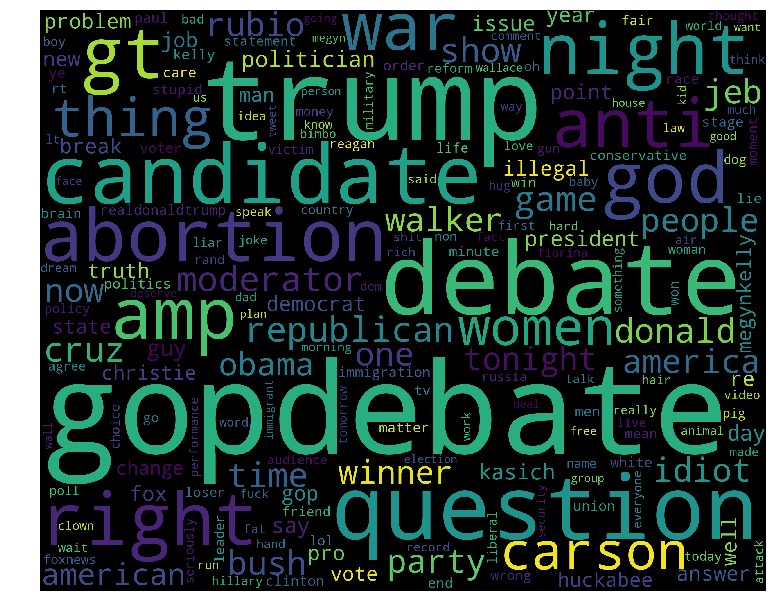

In [21]:
wordcloud_draw(w_features)

Using the nltk NaiveBayes Classifier I classified the extracted tweet word features.

In [22]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

Finally, with not-so-intelligent metrics, I tried to measure how the classifier algorithm scored.

In [23]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 840/802 
[Positive]: 244/88 


## Epilog ##

In this project I was curious how well nltk and the NaiveBayes Machine Learning algorithm performs for Sentiment Analysis. In my experience, it works rather well for negative comments. The problems arise when the tweets are ironic, sarcastic has reference or own difficult context.

Consider the following tweet:
*"Muhaha, how sad that the Liberals couldn't destroy Trump.  Marching forward."*
As you may already thought, the words **sad** and **destroy** highly influences the evaluation, although this tweet should be positive when observing its meaning and context. 

To improve the evalutation accuracy, we need something to take the context and references into consideration. As my project 2.0, I will try to build an LSTM network, and benchmark its results compared to this nltk Machine Learning implementation. Stay tuned. 